In [1]:
import tensorflow 
import keras

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

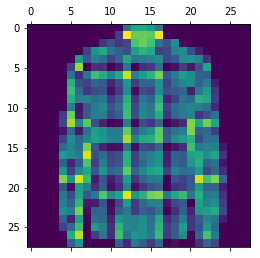

In [15]:
import matplotlib.pyplot as plt
plt.matshow(x_test[7])

In [16]:
x_train=x_train/255
y_test=y_test/255

In [17]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation
model=Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [32]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 8s 139us/step - loss: 1.1483 - acc: 0.6446
Epoch 2/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.6607 - acc: 0.7661
Epoch 3/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.5782 - acc: 0.7934
Epoch 4/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.5340 - acc: 0.8113
Epoch 5/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.5050 - acc: 0.8217
Epoch 6/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.4838 - acc: 0.8298
Epoch 7/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.4687 - acc: 0.8350
Epoch 8/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.4559 - acc: 0.8401
Epoch 9/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.4462 - acc: 0.8431
Epoch 10/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.4373 - a

In [33]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 85us/step


[15.026900231933594, 0.0602]

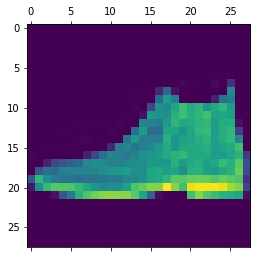

In [34]:
plt.matshow(x_test[0])

In [35]:
yp = model.predict(x_test)

In [36]:
import numpy as np
np.argmax(yp[0])

9

In [31]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_labels[np.argmax(yp[0])]

'Shirt'